In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
data=pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
#coorelation matrix

In [6]:
data.corr()

<ipython-input-6-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


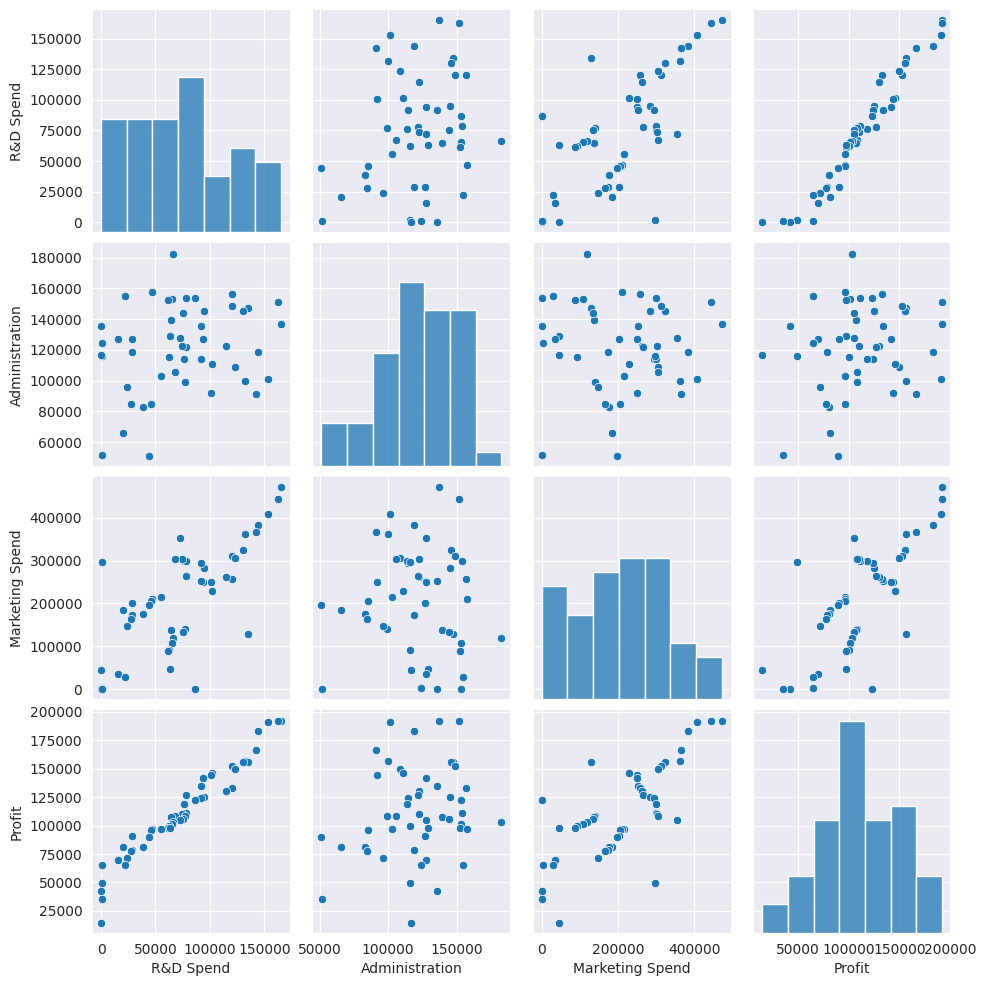

In [7]:
sns.set_style(style="darkgrid")
sns.pairplot(data)

In [8]:
data.rename(
    columns={"R&D Spend":"rd","Administration":"admin","Marketing Spend":"market"},
    inplace=True)
data

,rd,admin,market,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [9]:
#Preparing Model

In [10]:
#Building model
model=smf.ols("Profit~rd+admin+market+State",data=data).fit()


In [11]:
model.params

Intercept            50125.343832
State[T.Florida]       198.788793
State[T.New York]      -41.887019
rd                       0.806023
admin                   -0.027004
market                   0.026980
dtype: float64

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           1.34e-27
Time:                        09:16:14   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
rd                    0.8060      0.046     17.369      0.000       0.712       0.900
admin                -0.0270      0.052     -0.517      0.608      -0.132       0.078
market                0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
#as we know the p value of dministration and market spend is higher than 0.05.
#we are using simple linear regression model to check the p vlue is significant or not.


In [14]:
print(model.pvalues)

Intercept            4.444178e-09
State[T.Florida]     9.532429e-01
State[T.New York]    9.897941e-01
rd                   2.578772e-21
admin                6.077373e-01
market               1.226769e-01
dtype: float64


In [15]:
#we seen that market has a significant p value but the p value of the admin is insignificant.

In [16]:
#Multi linear regression

mlr_AD=smf.ols("Profit~admin+market",data=data).fit()
mlr_AD.pvalues

Intercept    2.589341e-01
admin        1.729198e-02
market       9.727245e-11
dtype: float64

In [17]:
# the p values of admin and market is significant in multi linear regression.

**Check colinearlity**

In [18]:
import math
rsq_ADMIN=smf.ols("admin~market+rd",data=data).fit().rsquared
vif_ADMIN=1/(1-rsq_ADMIN)


rsq_MARKET=smf.ols("market~rd+admin",data=data).fit().rsquared
vif_MARKET=1/(1-rsq_MARKET)

rsq_RD=smf.ols("rd~market+admin",data=data).fit().rsquared
vif_RD=1/(1-rsq_RD)


In [19]:
df={"INPUTS":["ADMIN","MARKET","RD"],"VIF":[vif_ADMIN,vif_MARKET,vif_RD]}

In [20]:
vif_RD

2.4689030699947017

In [21]:
vif_ADMIN

1.1750910070550453

In [22]:
vif_frame=pd.DataFrame(df)
vif_frame

,INPUTS,VIF
0,ADMIN,1.175091
1,MARKET,2.326773
2,RD,2.468903


# all the vif value for inputs are less than 20 we can say that there is no **coliniearity**

In [23]:
#partial Regression plot

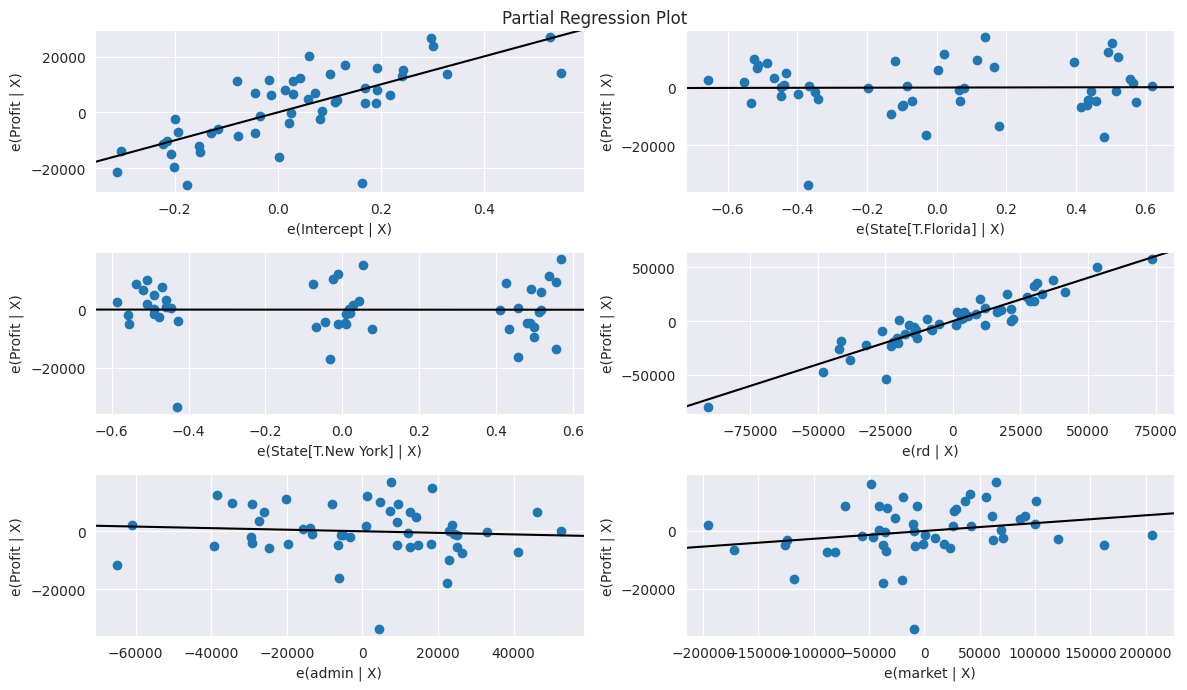

In [25]:
import statsmodels.api as sm
fig=plt.figure(figsize=(12,7))
fig=sm.graphics.plot_partregress_grid(model,fig=fig)
plt.show()

In [26]:
# from above figures we can say that all the inputs are contributing towards the output

**Cooks distance:-to find the outliers**

In [30]:
from statsmodels.graphics.regressionplots import influence_plot

In [32]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

<StemContainer object of 3 artists>

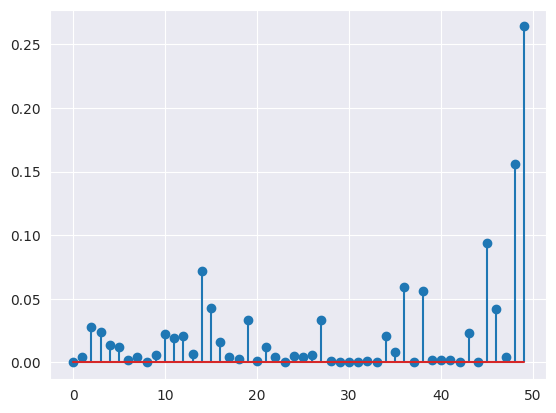

In [35]:
plt.stem(np.arange(len(data)),np.round(c,3))

**# from above figure we can see that 49th , 48th, 45th row have high influence values so we will remove**

In [37]:
data2=data.drop(data.index[[45,48,49]],axis=0).reset_index()
data2=data2.drop(["index"],axis=1)
data2

,rd,admin,market,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [38]:
model2=smf.ols("Profit~rd+admin+market",data=data2).fit()


**# Now check the outliers again**

In [39]:
model2_influence=model2.get_influence()
(c1,_)=model2_influence.cooks_distance

<StemContainer object of 3 artists>

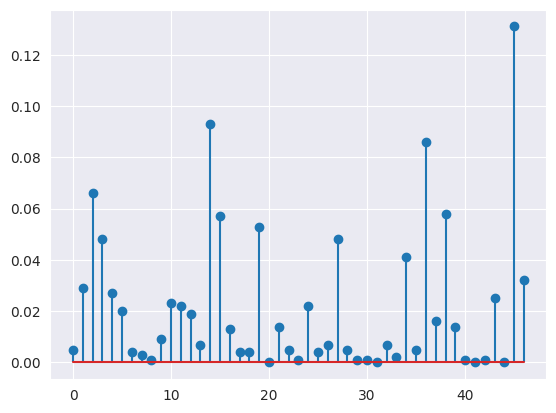

In [40]:
plt.stem(np.arange(len(data2)),np.round(c1,3))

In [41]:
data3=data2.drop(data2.index[[14,36,46]],axis=0).reset_index()
data3=data3.drop(["index"],axis=1)

In [42]:
data3

,rd,admin,market,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [44]:
model3=smf.ols("Profit~rd+admin+market",data=data3).fit()


**# now check again if there is any highly influential value or not**

In [46]:
model3_influence=model3.get_influence()
(c2,_)=model3_influence.cooks_distance

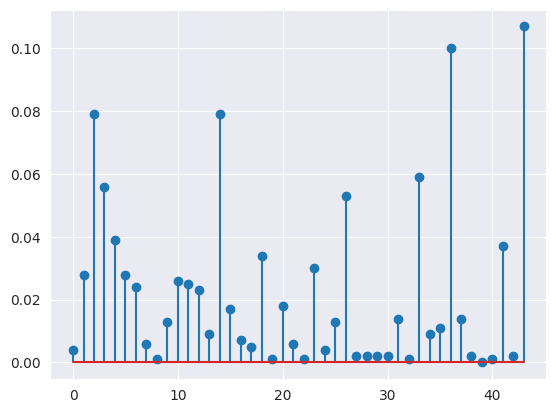

In [48]:
plt.stem(np.arange(len(data3)),np.round(c2,3))
plt.show()

In [49]:
data4=data3.drop(data3.index[[36,43]],axis=0).reset_index()
data4=data4.drop(["index"],axis=1)
data4

,rd,admin,market,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [54]:
model4=smf.ols('Profit~rd+admin+market',data=data4).fit()

**# now check again if there is any highly influential value or not**

In [55]:
model4_influence=model4.get_influence()
(c3,_)=model4_influence.cooks_distance

<StemContainer object of 3 artists>

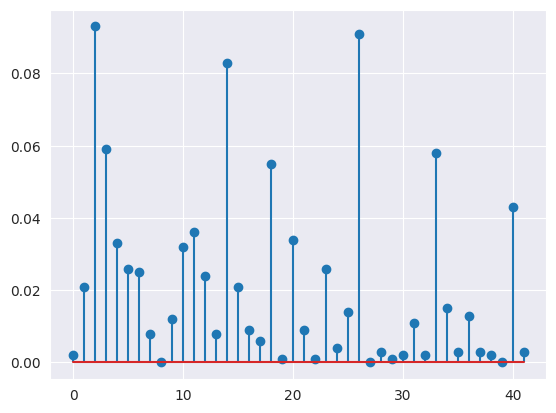

In [56]:
plt.stem(np.arange(len(data4)),np.round(c3,3))

**error assumption**

In [57]:
model4=smf.ols("Profit~rd+admin+market",data=data4).fit()
pred_profit=model4.predict(data4)
pred_profit

0     191147.327133
1     187913.243681
2     181508.919457
3     173154.127995
4     171902.373588
5     163331.211077
6     159393.126954
7     159792.286448
8     151601.733975
9     155041.708130
10    136273.384614
11    136296.948228
12    129648.813672
13    127928.501795
14    146653.511381
15    117371.255122
16    130337.094080
17    129259.448099
18    117935.010860
19    116879.403494
20    117299.331339
21    114858.179309
22    110251.665601
23    114921.097351
24    103582.688206
25    111932.473629
26    114142.718016
27    102888.674341
28    103294.250298
29    101313.964025
30     99342.483422
31    101126.472155
32     98904.206232
33     89730.728052
34     91697.092770
35     91083.999488
36     85174.994209
37     76071.306546
38     76334.534599
39     72214.857149
40     62452.703265
41     66772.840217
dtype: float64

In [60]:
errors=data4.Profit-pred_profit
errors

0      1114.502867
1      3878.816319
2      9541.470543
3      9747.862005
4     -5714.433588
5     -6340.091077
6     -3270.616954
7     -4039.686448
8       610.036025
9     -5281.748130
10     9848.565386
11     7962.451772
12    11936.706328
13     6378.848205
14   -16736.471381
15     9621.674878
16    -4966.724080
17    -4992.548099
18     4841.849140
19     1594.626506
20    -5986.311339
21    -4505.929309
22    -1517.675601
23    -6369.057351
24     3821.651794
25    -6198.933629
26    -9134.408016
27      393.705659
28    -2289.610298
29    -1376.374025
30    -1858.923422
31    -3698.632155
32    -2125.286232
33     6982.071948
34     4782.417230
35    -1134.859488
36    -4169.234209
37     2168.603454
38     1464.295401
39     -716.367149
40     7306.276735
41    -1572.510217
dtype: float64

In [61]:
errors.mean()

4.642753906193234e-11

<ipython-input-63-4a151ca7bc24>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors)


<Axes: ylabel='Density'>

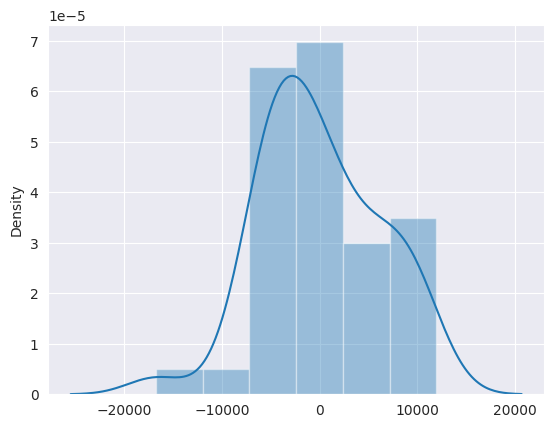

In [63]:
sns.distplot(errors)

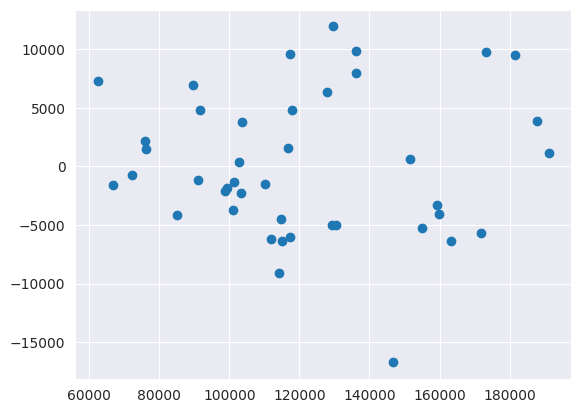

In [65]:
plt.scatter(pred_profit,errors)

** yes they do not follow any relation**

**Model validation:-**

In [67]:
from sklearn.model_selection import train_test_split

In [69]:
train_data,test_data=train_test_split(data4,test_size=0.3)


In [80]:
def RMSE (actual,pred):
  return np.sqrt(np.mean((actual-pred)*(actual-pred)))

In [71]:
#FOR TRAIN DATA:-

model_train=smf.ols("Profit~rd+admin+market",data=data4).fit()


In [76]:
pred_train_profit=model_train.predict(train_data)
actual_train_profit=train_data.Profit

In [81]:
rmse_train=RMSE(actual_train_profit,pred_train_profit)
rmse_train

6576.875287783894

**FOR TESTING DATA:-**

In [82]:
model_test=smf.ols("Profit~rd+admin+market",data=data4).fit()

In [83]:
pred_test_profit=model_test.predict(test_data)
actual_test_profit=test_data.Profit

In [84]:
rmse_test=RMSE(actual_test_profit,pred_test_profit)
rmse_test

4689.13259887852

**# as we can see the RMSE value of test data is less than training data , we can say thattraining data , we can say that our model is valid model **

In [88]:
df={"MODELS":["model","model2","model3","model4"],
    "R_SQRT":[model.rsquared,model2.rsquared,model3.rsquared,model4.rsquared]}

In [89]:
R_squared_table=pd.DataFrame(df)
R_squared_table

,MODELS,R_SQRT
0,model,0.950752
1,model2,0.964088
2,model3,0.969258
3,model4,0.967920


-------------------***END***------------------------

# multi Linear Regression of toyota corolla 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [4]:
toyota=pd.read_csv("ToyotaCorolla.csv",encoding="latin-1")
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [5]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [6]:
toyota.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [26]:
toyota2=pd.concat([toyota.iloc[:,2:4],toyota.iloc[:,6:7],toyota.iloc[:,8:9],toyota.iloc[:,12:14],toyota.iloc[:,15:18]],axis=1)
toyota2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [33]:
toyota3=toyota2.rename({"Age_08_04":"age"},axis=1)
toyota3

,Price,age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [34]:
toyota3[toyota3.duplicated()]

,Price,age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [35]:
toyota4=toyota3.drop_duplicates().reset_index(drop=True)
toyota4

,Price,age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [16]:
toyota4.describe()

,Price,age,KM,HP,cc,Doors,Cylinders,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,4.0,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.0,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,4.0,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,4.0,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,4.0,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,4.0,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,4.0,283.000000,1615.000000


# Correlatin analysis 

In [28]:
toyota4.corr()

,Price,age,KM,HP,cc,Doors,Cylinders,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,NaN,0.211508,0.575869
age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,NaN,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,NaN,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,NaN,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,NaN,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,NaN,0.107353,0.301734
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,NaN,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,NaN,0.621988,1.000000


In [29]:
toyota.corr()

C:\Users\100ra\AppData\Local\Temp\ipykernel_6148\2810699759.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  toyota.corr()


,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


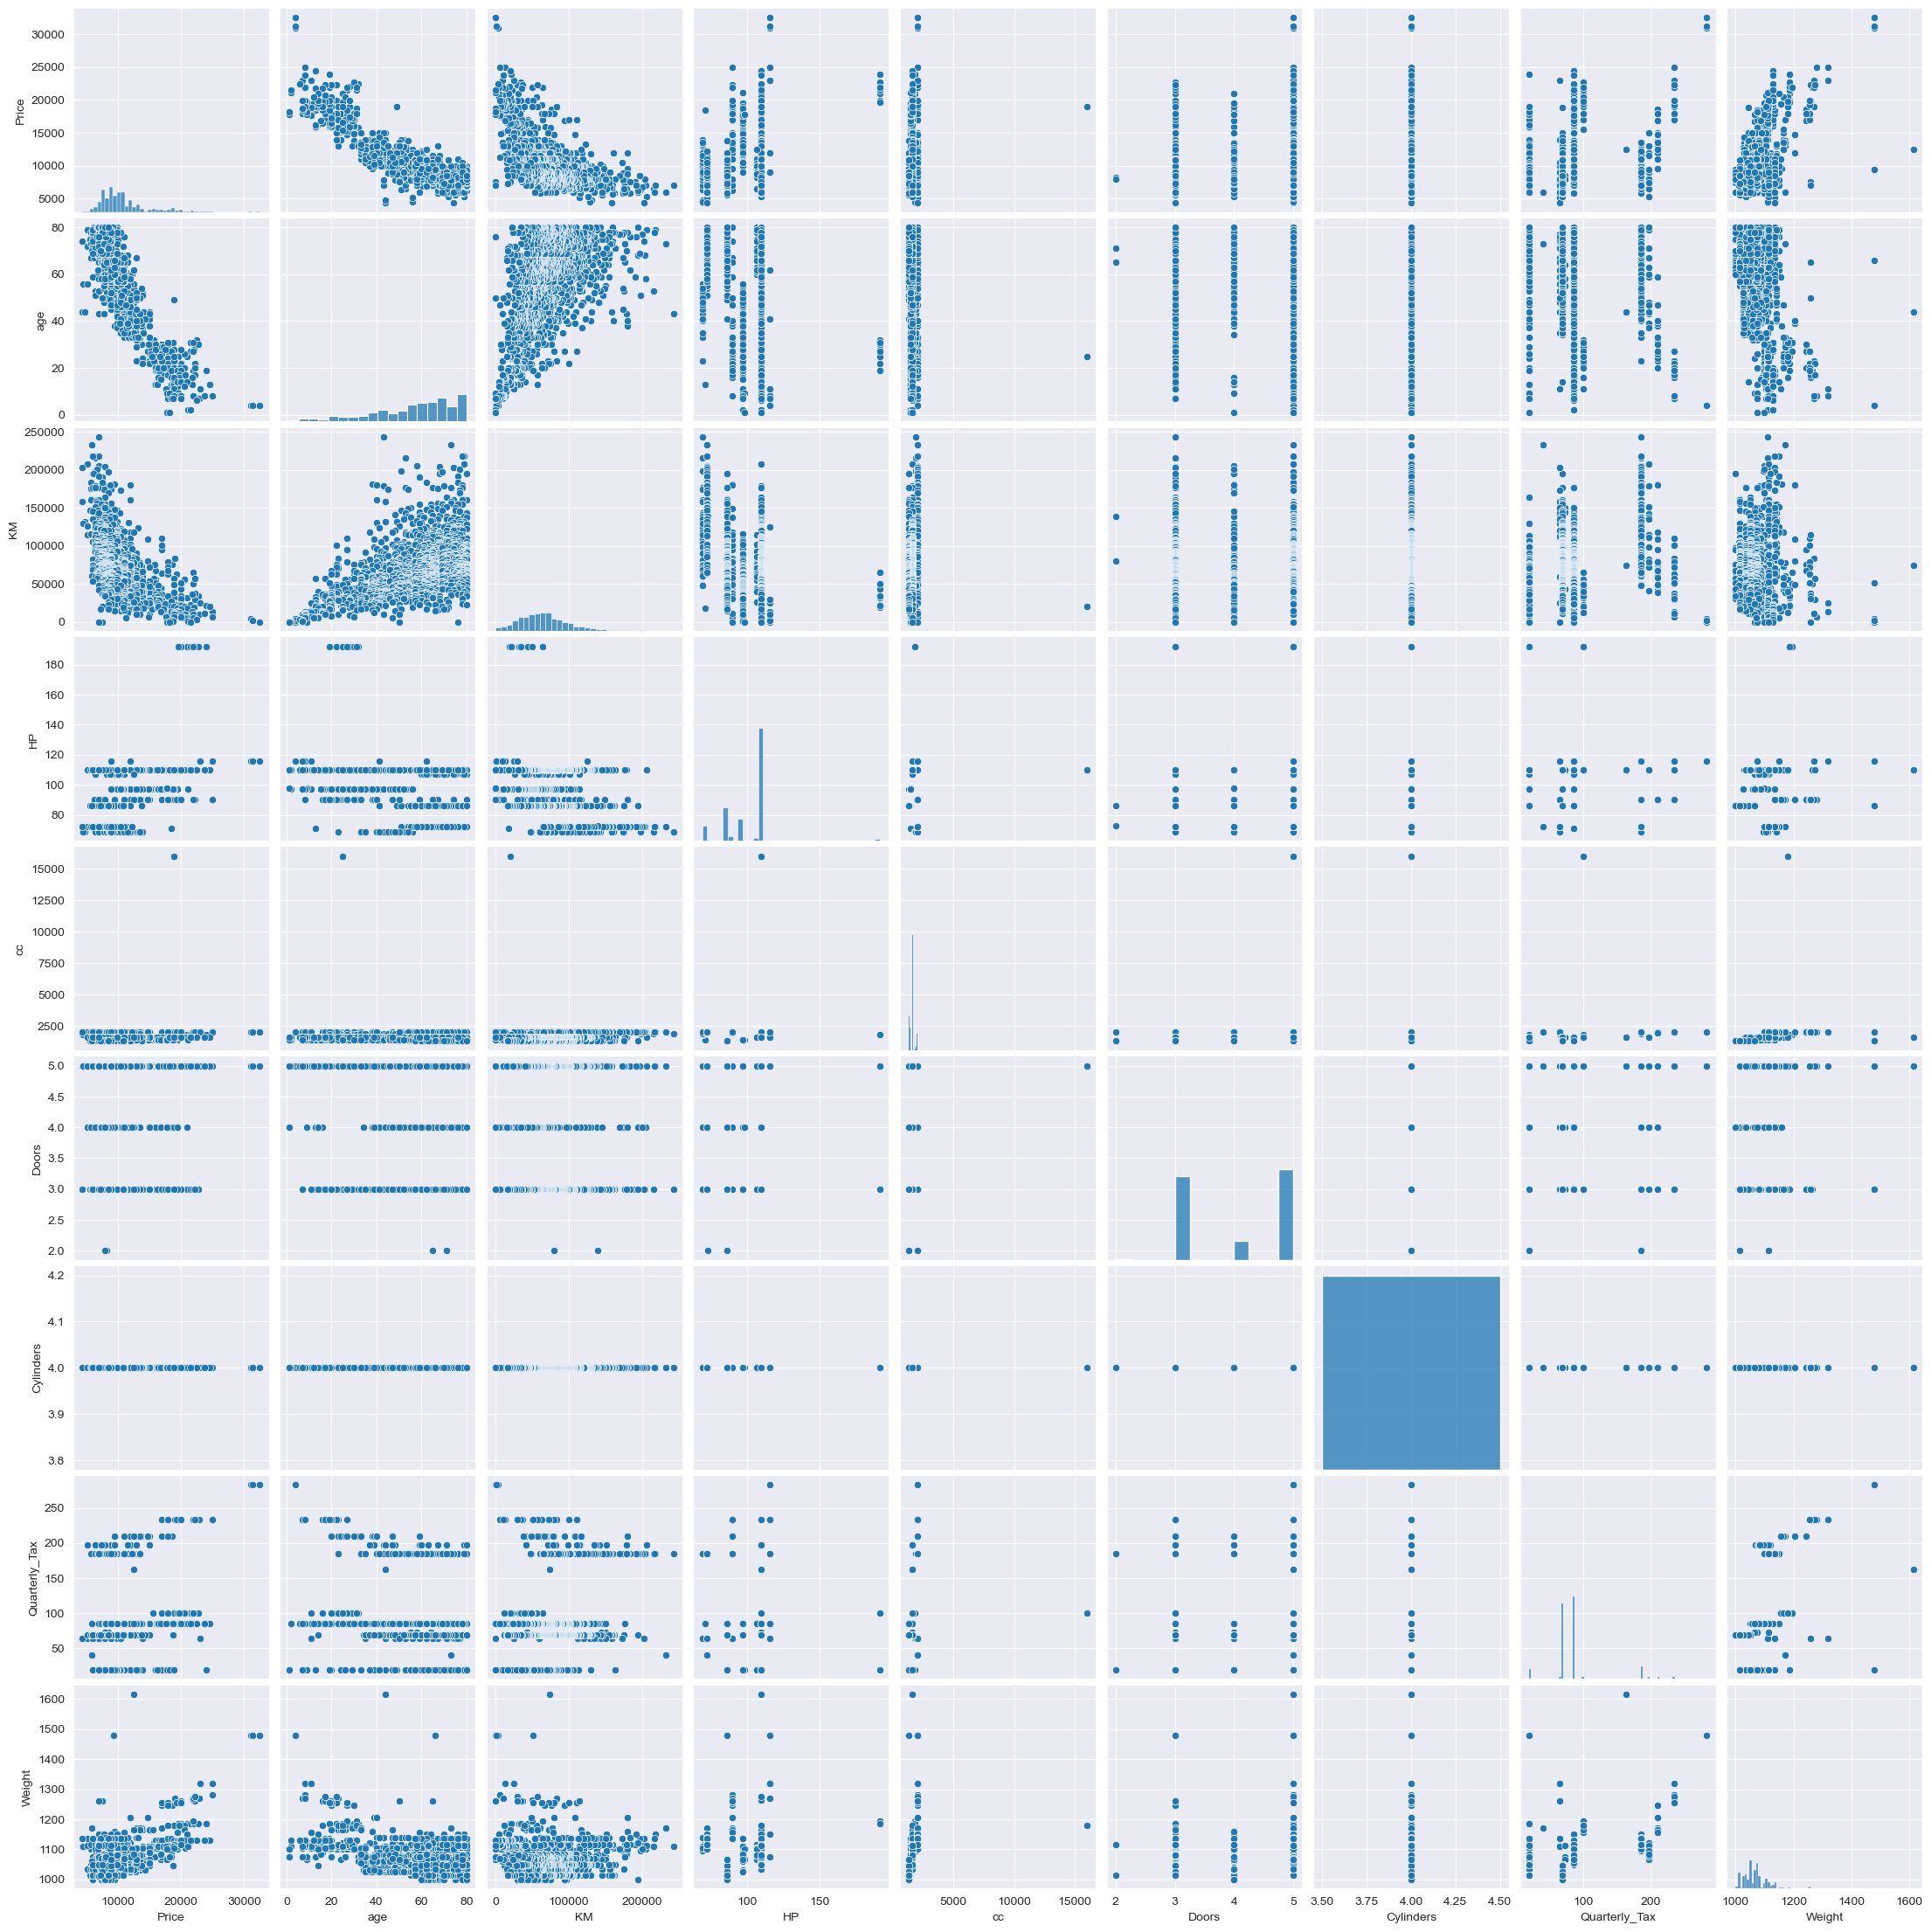

In [30]:
sns.set_style(style="darkgrid")
sns.pairplot(toyota4)

In [36]:
toyota4.columns

Index(['Price', 'age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight'],
      dtype='object')

# Model Building

In [38]:
model=smf.ols("Price~age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=toyota4).fit()

# Model testing 

In [39]:
model.params

Intercept       -5472.540368
age              -121.713891
KM                 -0.020737
HP                 31.584612
cc                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

In [40]:
model.tvalues,np.round(model.pvalues,5)

(Intercept        -3.875273
 age             -46.551876
 KM              -16.552424
 HP               11.209719
 cc               -1.316436
 Doors            -0.023012
 Gears             3.034563
 Quarterly_Tax     2.944198
 Weight           15.760663
 dtype: float64,
 Intercept        0.00011
 age              0.00000
 KM               0.00000
 HP               0.00000
 cc               0.18824
 Doors            0.98164
 Gears            0.00245
 Quarterly_Tax    0.00329
 Weight           0.00000
 dtype: float64)

In [42]:
model.rsquared,model.rsquared_adj

(0.8625200256947001, 0.8617487495415147)

In [43]:
slr_c=smf.ols("Price~cc",data=toyota4).fit()

In [52]:
slr_c.tvalues,slr_c.pvalues
# cc has significant value

(Intercept    24.879592
 cc            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 cc            2.292856e-06
 dtype: float64)

In [53]:
slr_d=smf.ols("Price~Doors",data=toyota4).fit()
slr_d.tvalues,slr_d.pvalues
#Doors has the significant values

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [56]:
mlr_cd=smf.ols('Price~cc+Doors',data=toyota4).fit()
mlr_cd.tvalues , mlr_cd.pvalues # CC & Doors have significant pvalue


(Intercept    12.786341
 cc            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 cc           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

# Model Validation Techiques
# 1.Collinearity Check & Residual Anaylsis 

In [59]:
toyota4.columns

Index(['Price', 'age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight'],
      dtype='object')

In [63]:
rsq_age=smf.ols("age~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=toyota4).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols("KM~age+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=toyota4).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols("HP~KM+cc+Doors+Gears+Quarterly_Tax+Weight",data=toyota4).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_cc=smf.ols("cc~KM+HP+Doors+Gears+Quarterly_Tax+Weight",data=toyota4).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_Doors=smf.ols("Doors~KM+HP+cc+Gears+Quarterly_Tax+Weight",data=toyota4).fit().rsquared
vif_Doors=1/(1-rsq_Doors)

rsq_Gears=smf.ols("Gears~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=toyota4).fit().rsquared
vif_Gears=1/(1-rsq_Gears)

rsq_QT=smf.ols("Quarterly_Tax~KM+HP+cc+Doors+Gears+Weight",data=toyota4).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols("Weight~KM+HP+cc+Doors+Gears+Quarterly_Tax",data=toyota4).fit().rsquared
vif_WT=1/(1-rsq_WT)

C:\Users\100ra\AppData\Local\Temp\ipykernel_6148\567001883.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  vif_Gears=1/(1-rsq_Gears)


# Puting the value in the Data Frame 

In [64]:
data={"Variable":['age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight'],
     "vif":[vif_age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_QT,vif_WT]}
vif_df=pd.DataFrame(data)
vif_df

,Variable,vif
0,age,1.876236
1,KM,1.757178
2,HP,1.416990
3,cc,1.163301
4,Doors,1.155880
5,Gears,inf
6,Quarterly_Tax,2.282944
7,Weight,2.174273


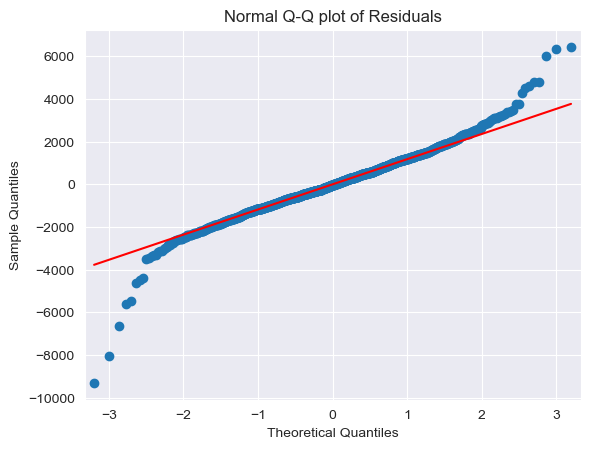

In [65]:
sm.qqplot(model.resid,line="q")
plt.title("Normal Q-Q plot of Residuals")
plt.show()

In [66]:
list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [68]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [69]:
def standard_values(vals):return (vals-vals.mean())/vals.std()

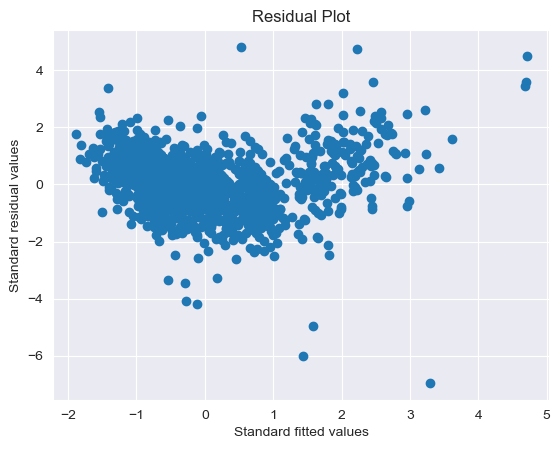

In [70]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title("Residual Plot")
plt.xlabel("Standard fitted values")
plt.ylabel("Standard residual values")
plt.show()

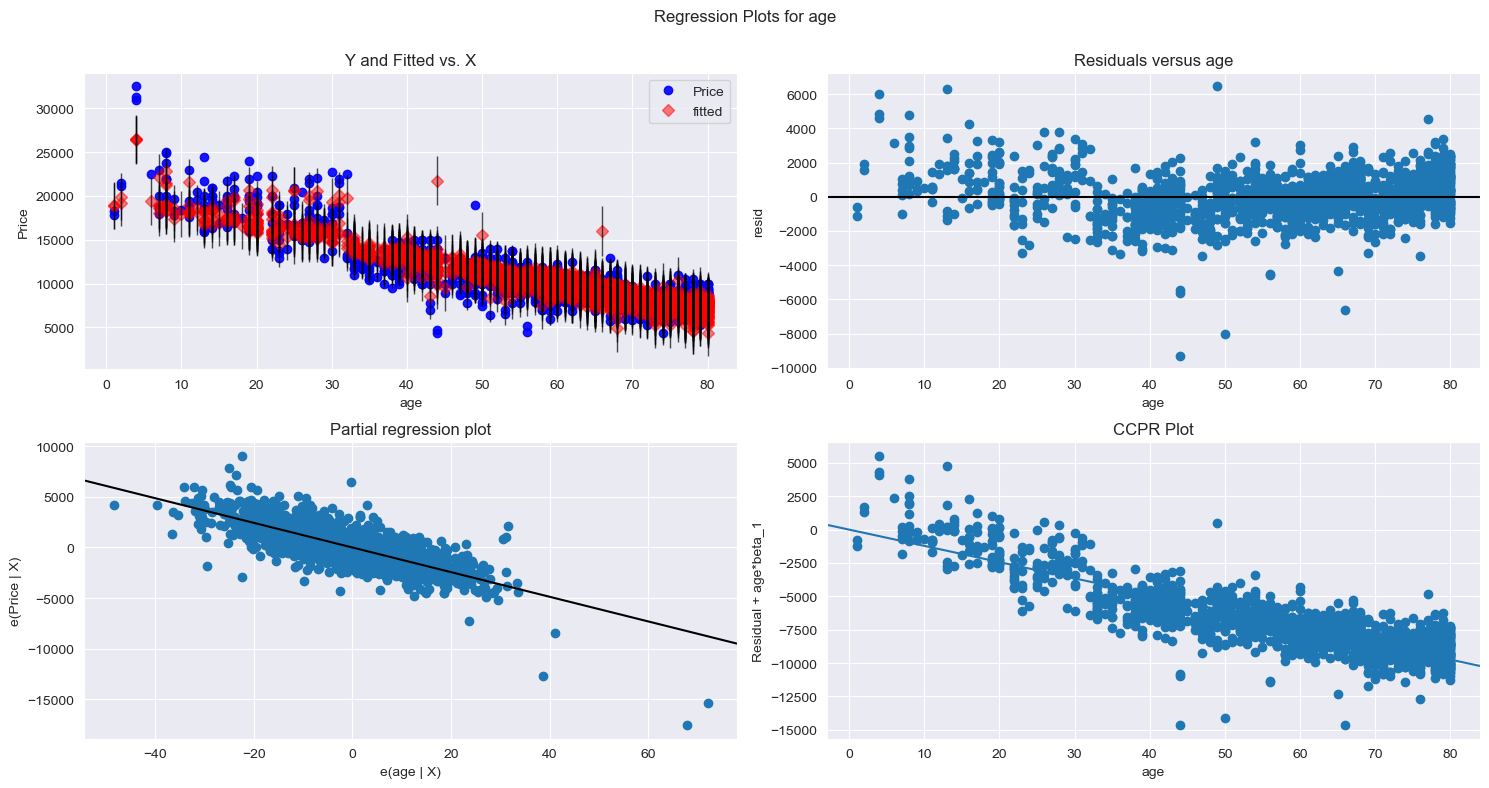

In [71]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"age",fig=fig)
plt.show()

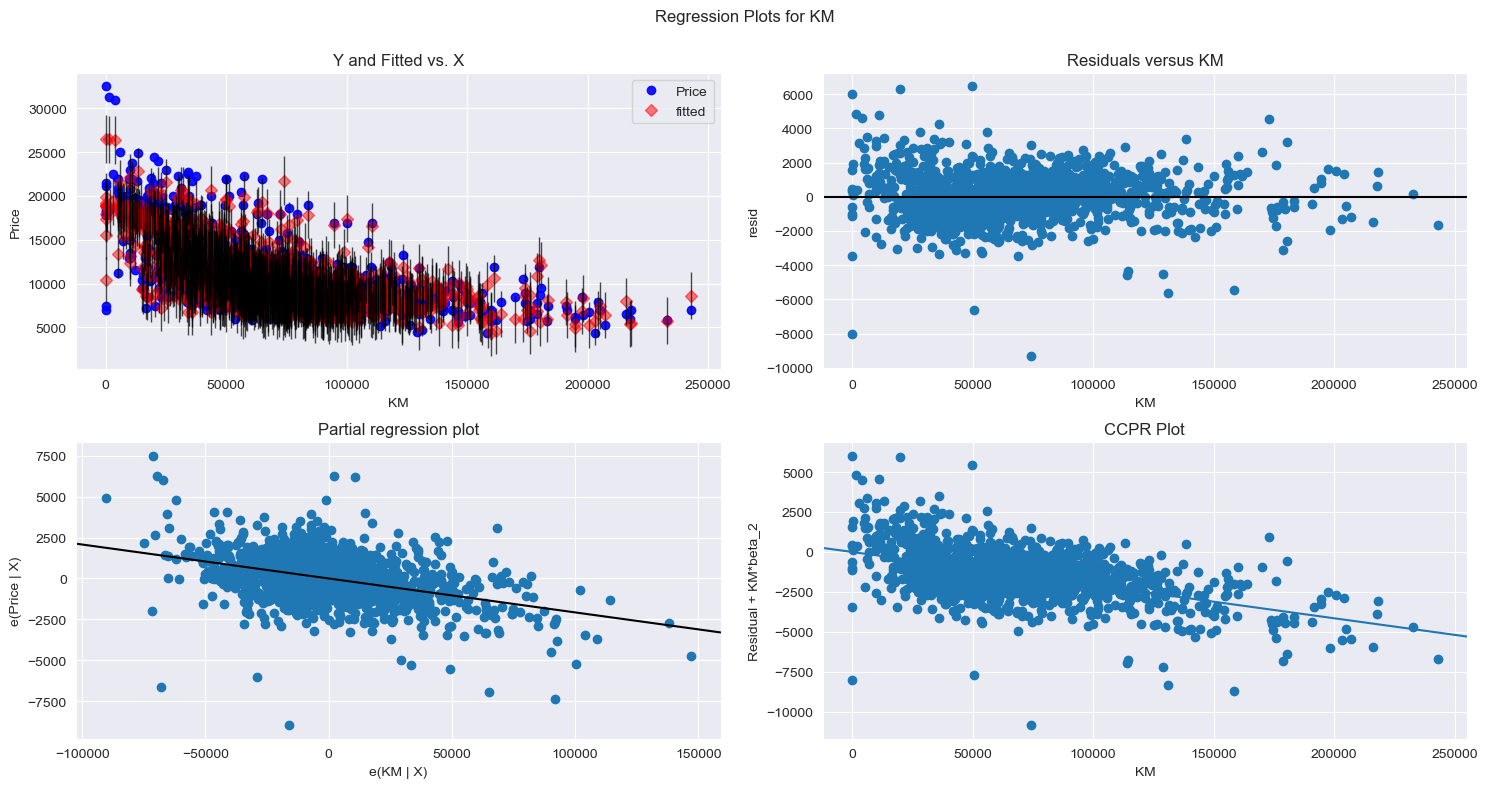

In [72]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

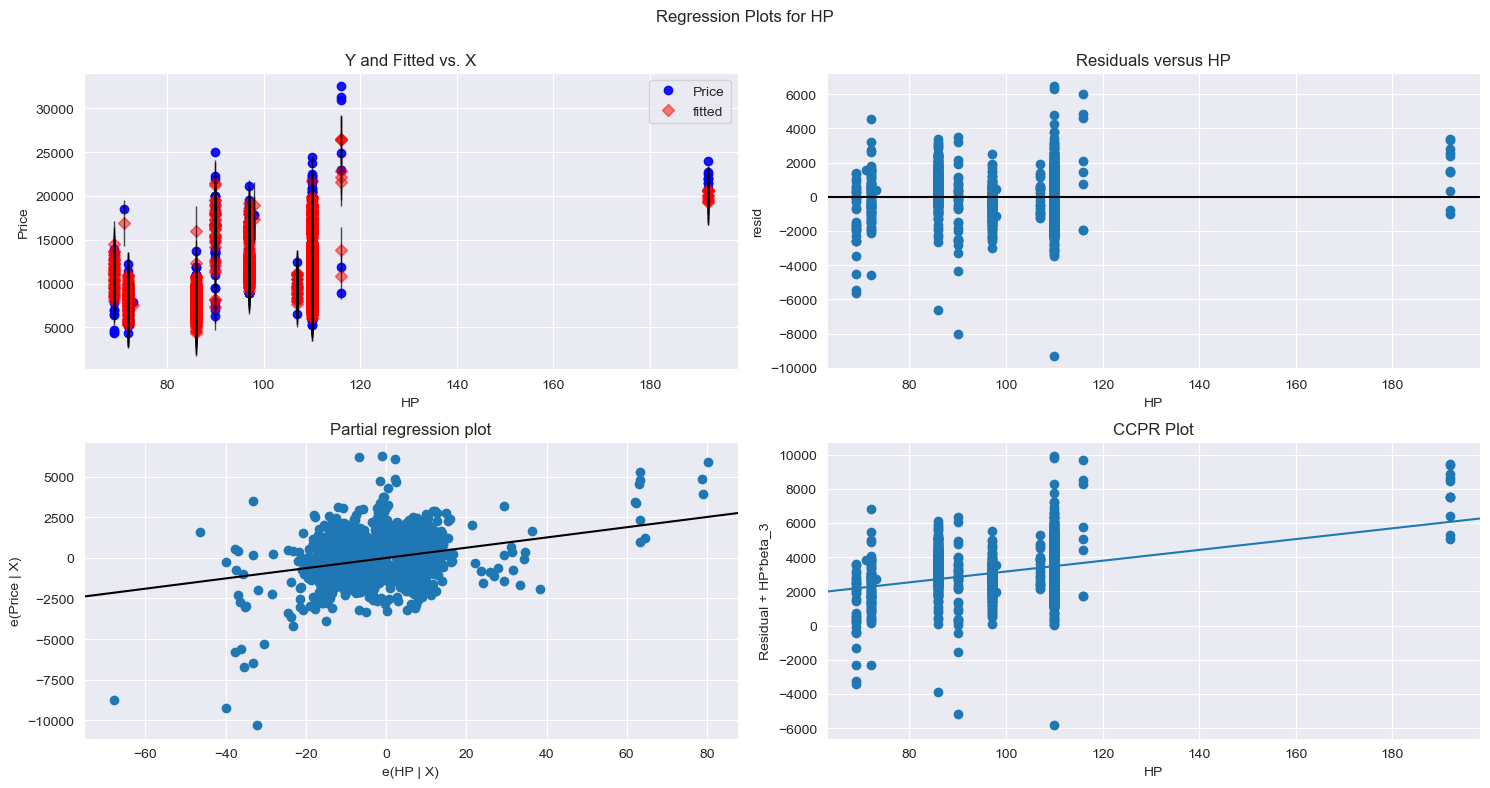

In [73]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

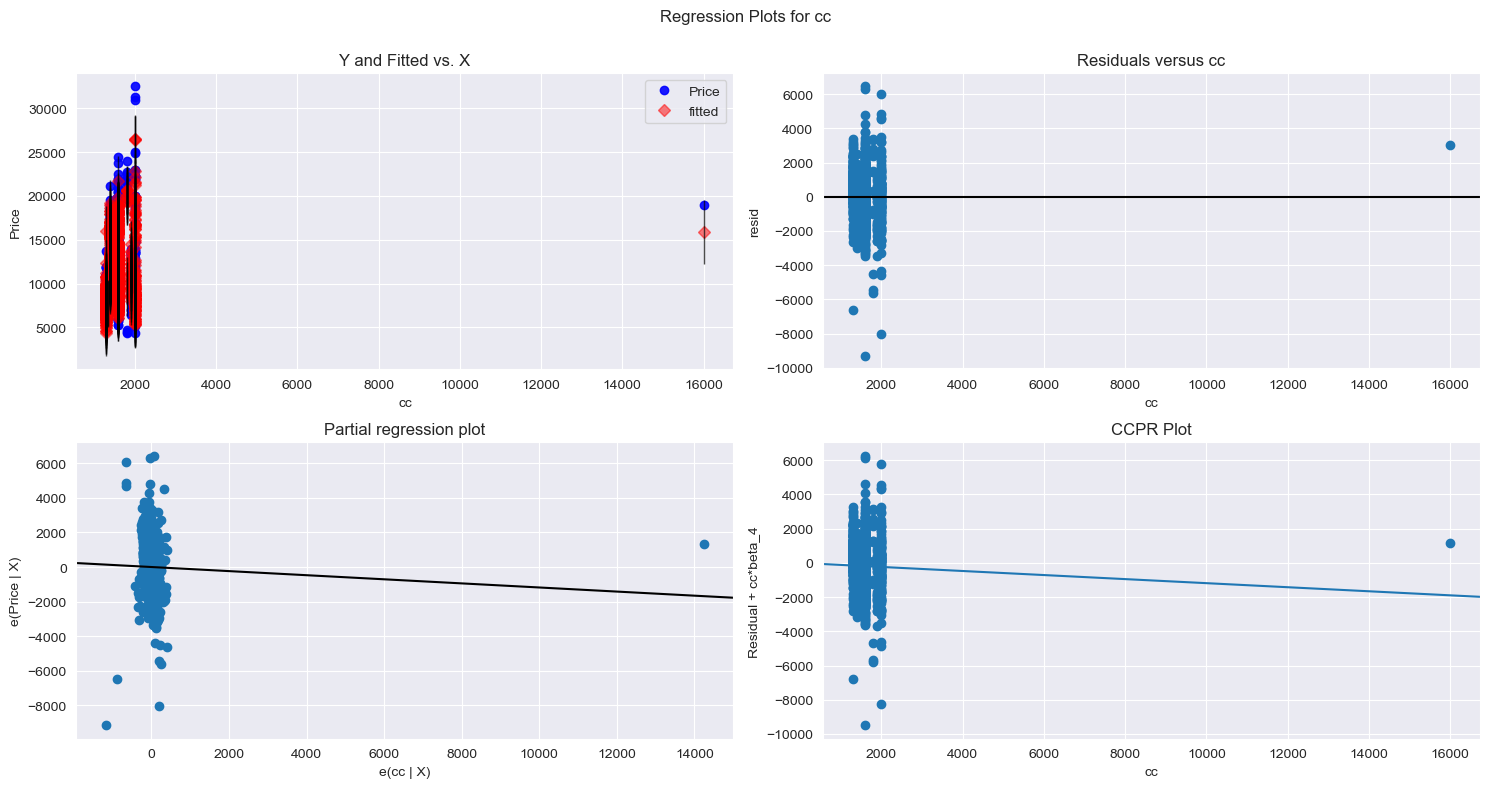

In [74]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"cc",fig=fig)
plt.show()

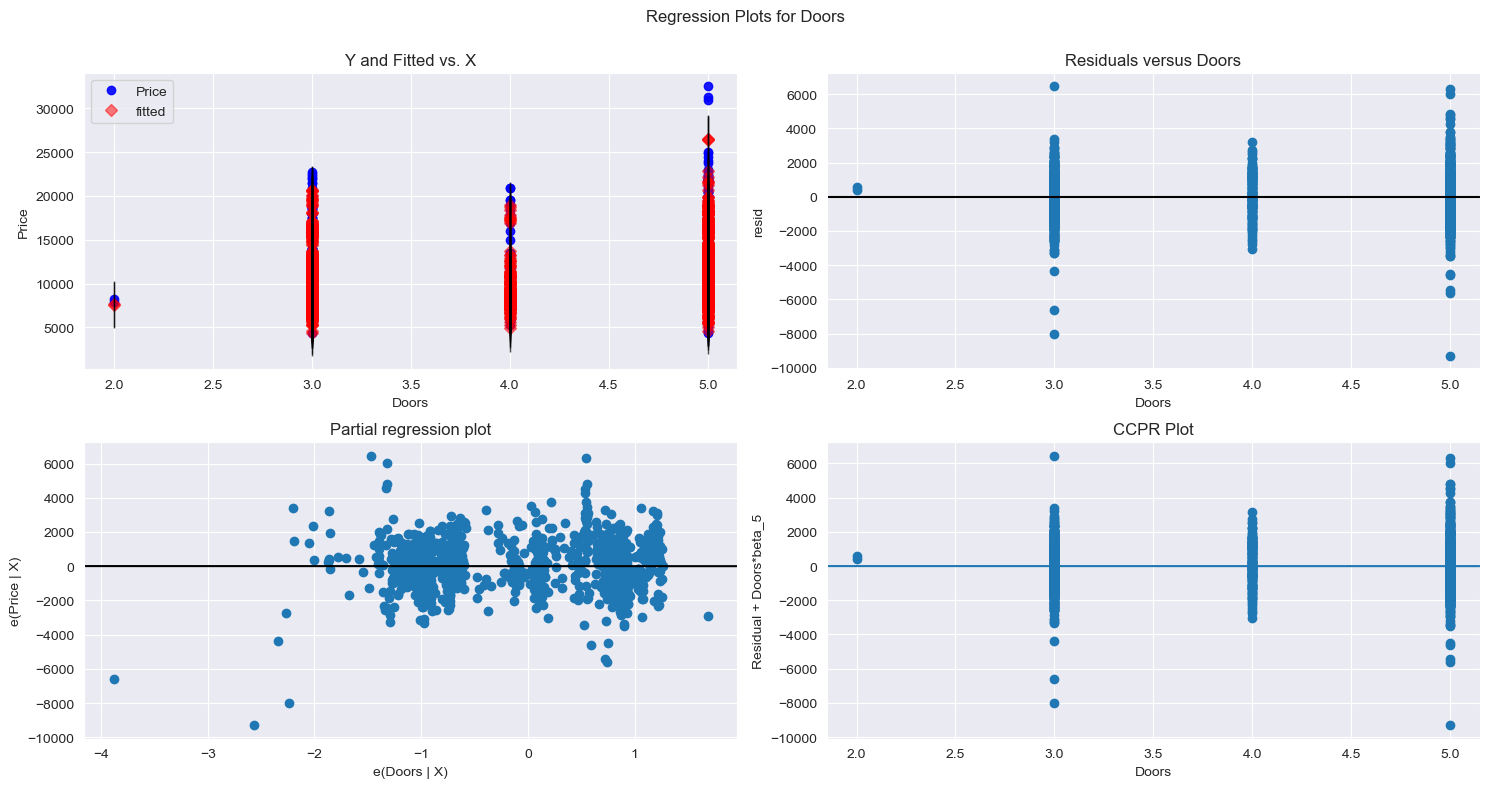

In [76]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

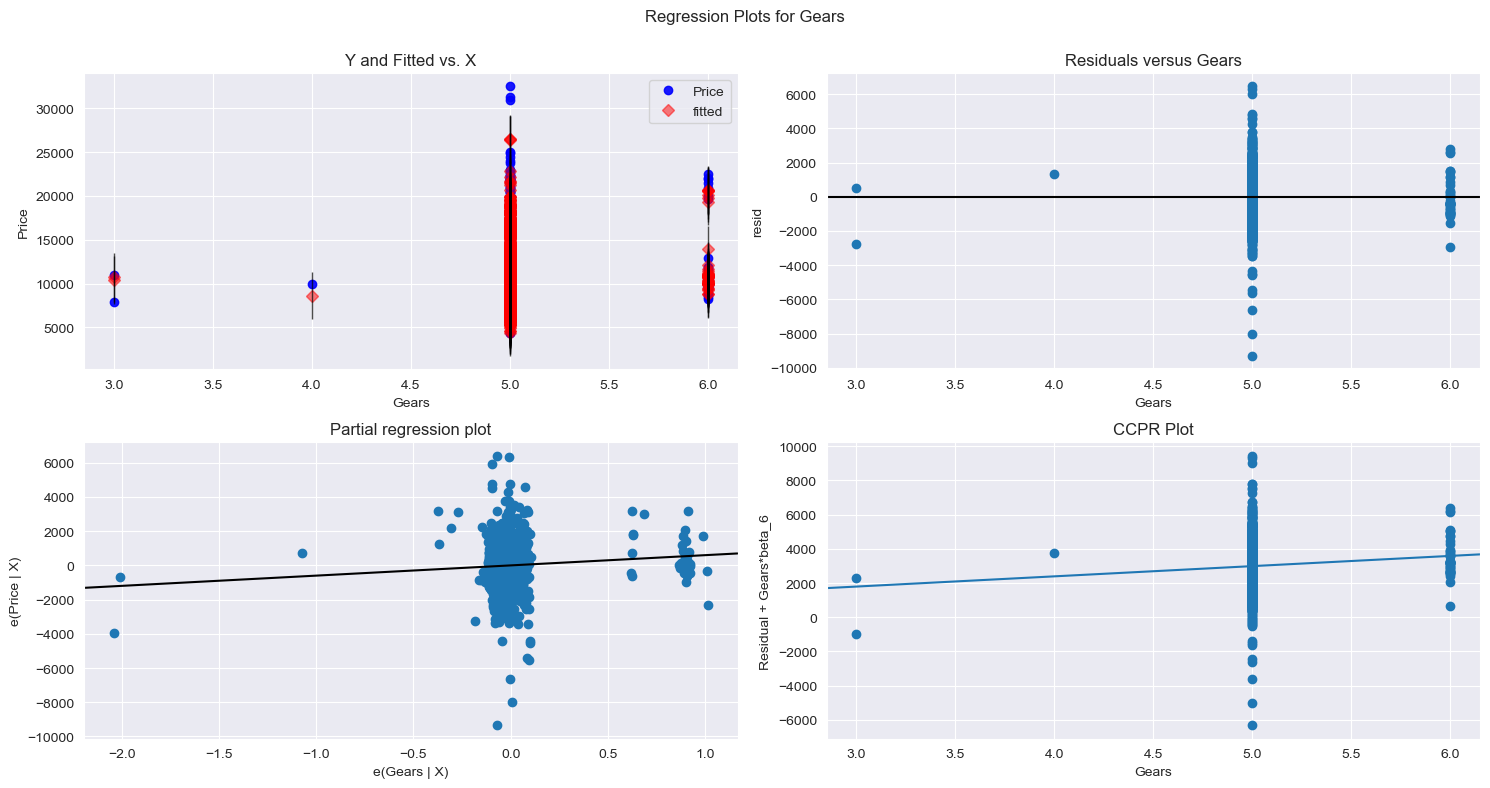

In [77]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"Gears",fig=fig)
plt.show()

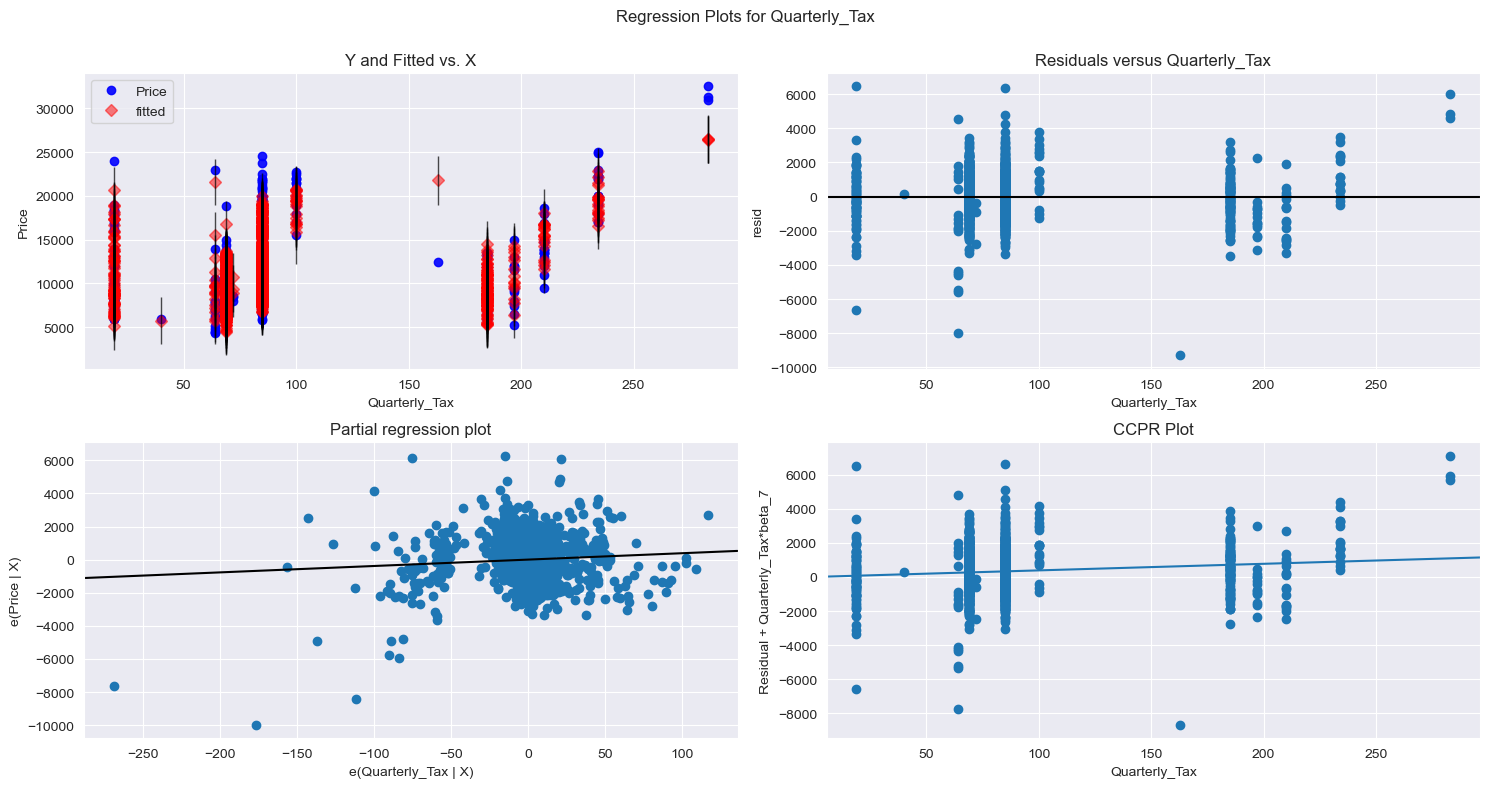

In [79]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"Quarterly_Tax",fig=fig)
plt.show()

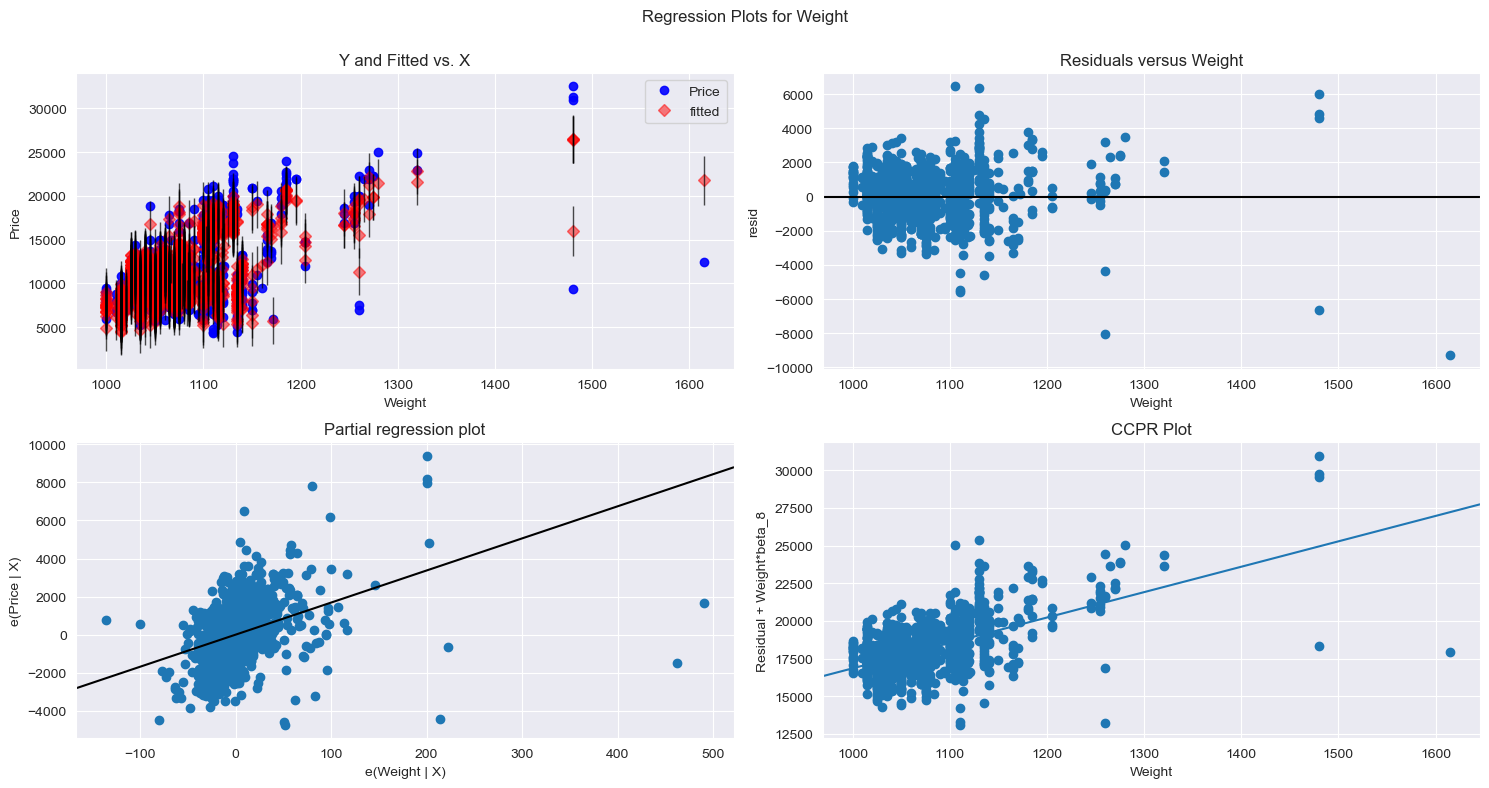

In [80]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"Weight",fig=fig)
plt.show()

# Checking Outliers 
# 1.Cooks Distance
# 2.Leverage value

In [106]:
(cd,_)=model.get_influence().cooks_distance
cd

array([6.82389815e-03, 3.57552355e-03, 4.84841789e-03, ...,
       1.03806619e-05, 1.10039755e-03, 1.82165409e-02])

In [107]:
if len(toyota4) !=len(cd):
    print("Error: Length of the arrays do not match.")

else:
    fig=plt.figure(figsize=(20,7))
    plt.stem(np.arange(len(toyota4)),np.round(cd,3))
    plt.xlabel("Row Index")
    plt.ylabel("Cooks Distance")
    plt.show()

Error: Length of the arrays do not match.


In [110]:
np.argmax(cd),np.max(cd)

(598, 0.31689035401435783)

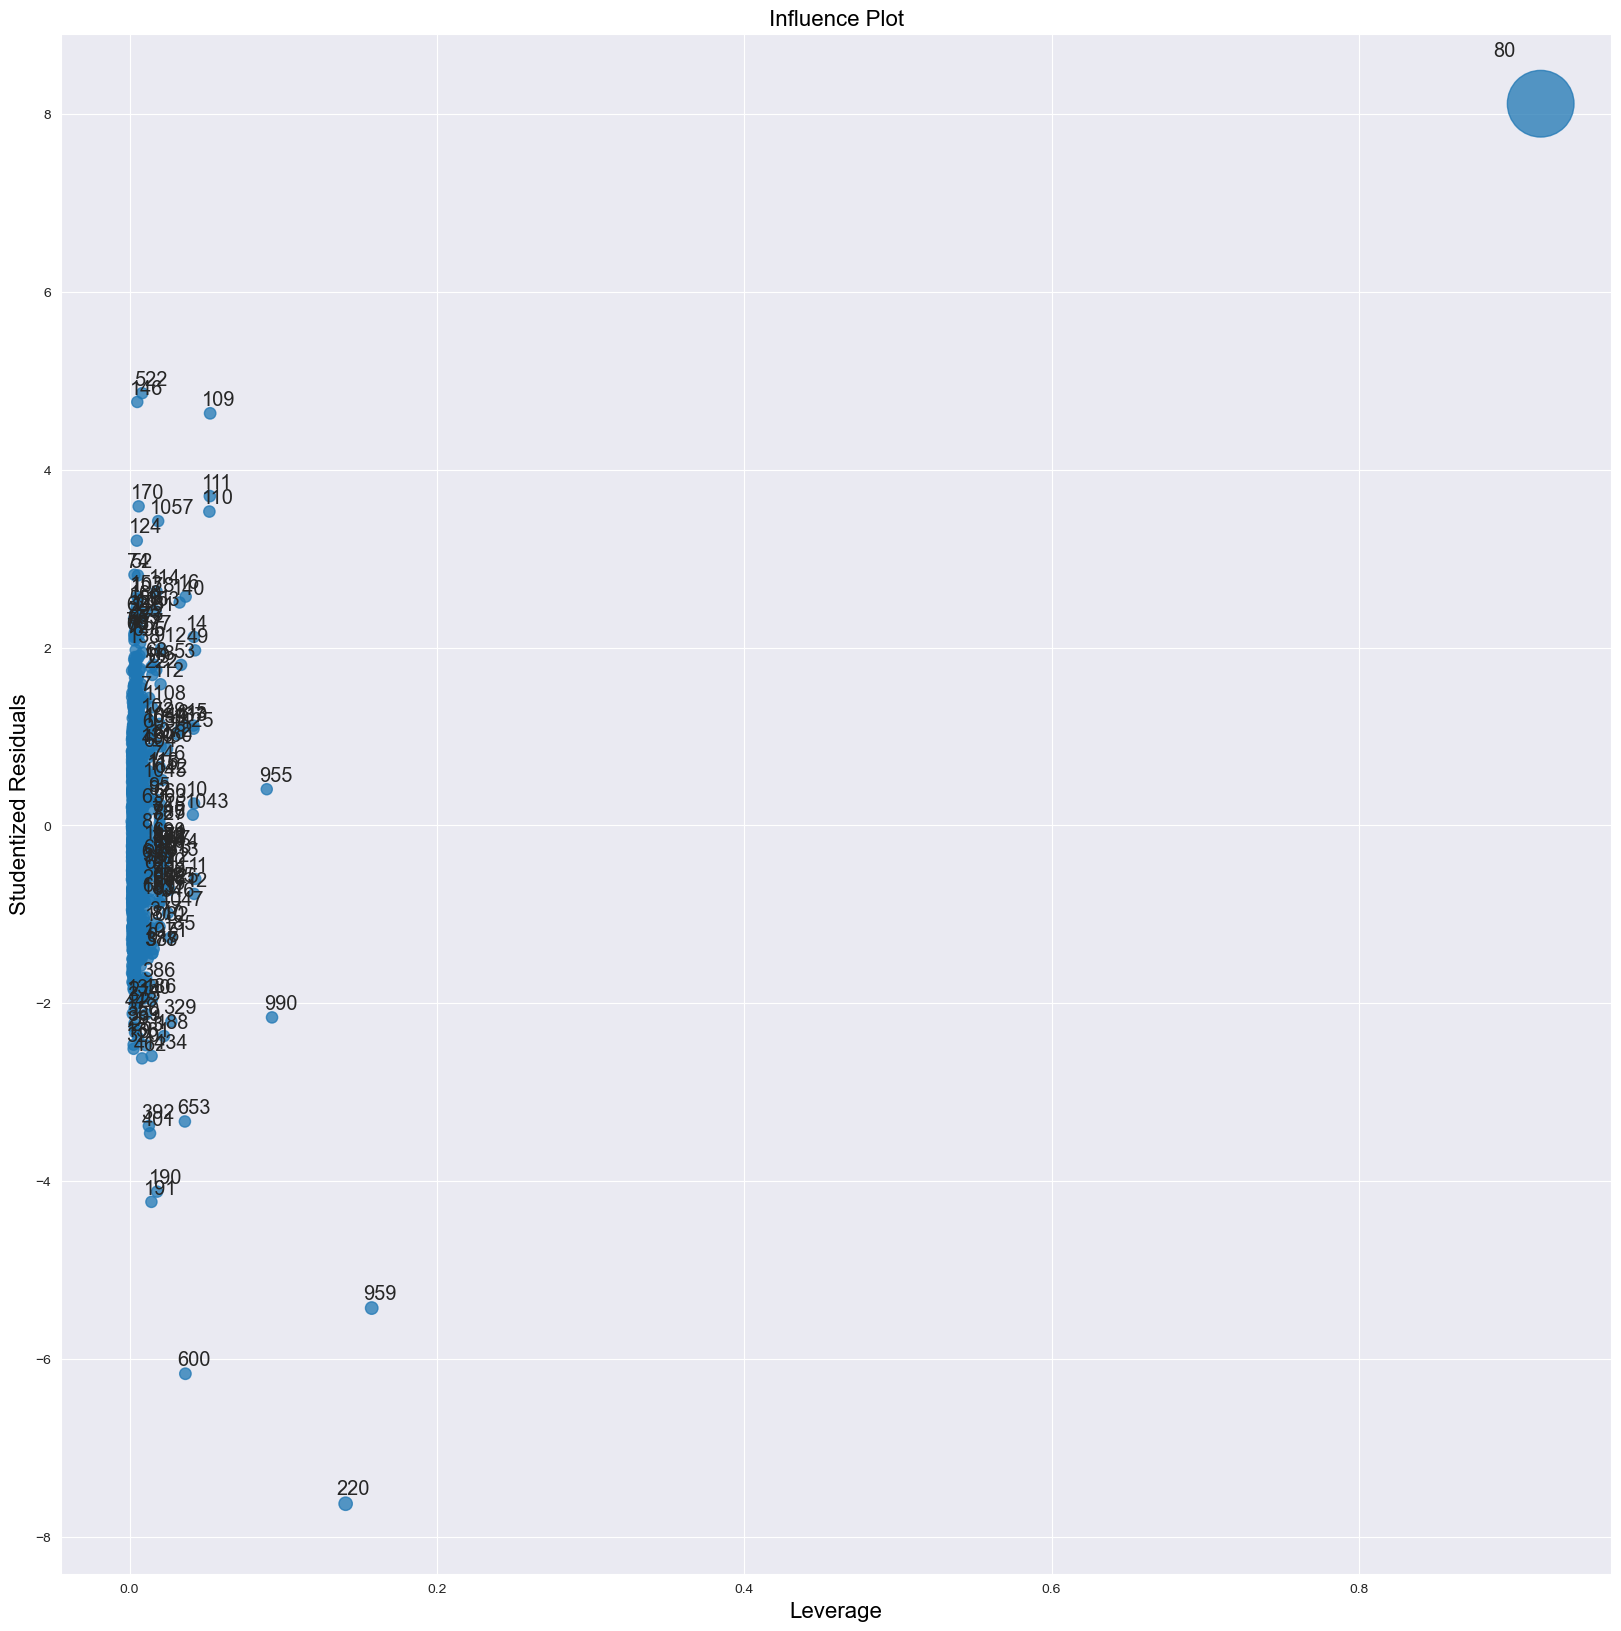

In [95]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax=ax)

In [96]:
k=toyota4.shape[1]
n=toyota4.shape[0]
leverage_cutoff=(3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [98]:
toyota4[toyota4.index.isin([80])]

,Price,age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# Improving the model

In [99]:
toyota_im=toyota4.copy()
toyota_im

,Price,age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [100]:
toyota5=toyota_im.drop(toyota_im.index[[80]],axis=0).reset_index(drop=True)
toyota5

,Price,age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


# Final Model

In [111]:
 while np.max(cd)>0.5 :
    model=smf.ols('Price~age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota5).fit()
    (cd)=model.get_influence().cooks_distance
    cd
    np.argmax(cd) , np.max(cd)
    toyota5=toyota5.drop(toyota5.index[[np.argmax(cd)]],axis=0).reset_index(drop=True)
    toyota5
else:
    final_model=smf.ols('Price~age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota5).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy value is improved to",final_model.rsquared)

Thus model accuracy value is improved to 0.8839684606741538


In [114]:
if np.max(cd)>0.5:
    model=smf.ols('Price~age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota5).fit()
    (cd,_)=model.get_influence().cooks_distance
    cd
    np.argmax(cd) , np.max(cd)
    toyota5=toyota5.drop(toyota5.index[[np.argmax(cd)]],axis=0).reset_index(drop=True)
    toyota5
elif np.max(cd)<0.5:
    final_model=smf.ols('Price~age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota5).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)


Thus model accuracy is improved to 0.8839684606741538


In [115]:
final_model.rsquared

0.8839684606741538

In [116]:
toyota5

,Price,age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,5,69,1025
1428,10845,72,19000,86,1300,3,5,69,1015
1429,8500,71,17016,86,1300,3,5,69,1015
1430,7250,70,16916,86,1300,3,5,69,1015


# Model Prediction

In [121]:
new_data=pd.DataFrame({'age':12,"KM":40000,"HP":80,"cc":1300,"Doors":4,"Gears":5,"Quarterly_Tax":69,"Weight":1012},index=[0])
new_data

,age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,12,40000,80,1300,4,5,69,1012


In [122]:
final_model.predict(new_data)

0    14433.519524
dtype: float64

In [123]:
pred_y=final_model.predict(toyota5)
pred_y

0       16326.634426
1       15886.220972
2       16304.093367
3       15973.237208
4       15839.043084
            ...     
1427     9114.821644
1428     8499.169594
1429     8644.902871
1430     8758.662855
1431    10638.570082
Length: 1432, dtype: float64

In [ ]:
------------------------------END----------------------------